<a href="https://colab.research.google.com/github/ManithSoun/munchy-ai-recipe-generator/blob/main/Munchy_Recipe_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/AI Recipe Final Project"

 cleaned_dataset.csv		      X_images.npy   y_labels.npy
'FOOD-INGREDIENTS dataset.v2i.coco'   X_test.npy     y_test.npy
 full_dataset.csv		      X_train.npy    y_train.npy
 label_binarizer.pkl		      X_valid.npy    y_valid.npy


## **1. Image Dataset Preprocessing**

In [3]:
!pip install pycocotools opencv-python-headless

In [4]:
import os
import cv2
import numpy as np
from pycocotools.coco import COCO
from tqdm import tqdm
import matplotlib.pyplot as plt

# **Preprocesing function of Image + Annotation**

In [5]:
def preprocess_image(images_dir, annotation_path, img_size=(224, 224)):
  coco = COCO(annotation_path)
  img_ids = coco.getImgIds()

  X = []
  y = []

  for img_id in tqdm(img_ids, desc=f"Processing {os.path.basename(annotation_path)}"):
    img_info = coco.loadImgs(img_id)[0]
    file_name = img_info['file_name']
    img_path = os.path.join(images_dir, file_name)

    img = cv2.imread(img_path)

    if img is not None:
      if img.ndim == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) #if the image is 2D and no color (gray to RGB)
      elif img.shape[2] == 4:
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR) #if the image has 4 channels (RGB and Alpha) but it will remove alpha(transparency)

      # Resize and normalize
      img = cv2.resize(img, img_size)
      img = img / 255.0
      X.append(img)

      #Extract label in annotation file)
      ann_ids = coco.getAnnIds(imgIds=img_id)
      anns = coco.loadAnns(ann_ids)
      labels = list(set([ann["id"] for ann in anns]))
      y.append(labels)


  return np.array(X), y

**Start preprocessing the image dataset (train, valide, and test)**

In [7]:
base_path = "/content/drive/MyDrive/AI Recipe Final Project/FOOD-INGREDIENTS dataset.v2i.coco"

X_test, y_test = preprocess_image(os.path.join(base_path, "test"),
                                  os.path.join(base_path, "test", "_annotations.coco.json"))

X_train, y_train = preprocess_image(os.path.join(base_path, "train"),
                                    os.path.join(base_path, "train", "_annotations.coco.json"))

X_valid, y_valid = preprocess_image(os.path.join(base_path, "valid"),
                                    os.path.join(base_path, "valid", "_annotations.coco.json"))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Processing _annotations.coco.json: 100%|██████████| 575/575 [00:03<00:00, 147.39it/s]


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


Processing _annotations.coco.json: 100%|██████████| 2791/2791 [00:18<00:00, 152.79it/s]


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Processing _annotations.coco.json: 100%|██████████| 829/829 [00:05<00:00, 154.50it/s]


**Convert the image that has multi-labels to binary format**

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_valid = mlb.transform(y_valid)
y_test = mlb.transform(y_test)

In [9]:
import joblib
joblib.dump(mlb, "/content/drive/MyDrive/AI Recipe Final Project/label_binarizer.pkl")

['/content/drive/MyDrive/AI Recipe Final Project/label_binarizer.pkl']

In [10]:
np.save("/content/drive/MyDrive/AI Recipe Final Project/X_train.npy", X_train)
np.save("/content/drive/MyDrive/AI Recipe Final Project/X_valid.npy", X_valid)
np.save("/content/drive/MyDrive/AI Recipe Final Project/X_test.npy", X_test)

np.save("/content/drive/MyDrive/AI Recipe Final Project/y_train.npy", y_train)
np.save("/content/drive/MyDrive/AI Recipe Final Project/y_valid.npy", y_valid)
np.save("/content/drive/MyDrive/AI Recipe Final Project/y_test.npy", y_test)

In [34]:
import json

# Load the COCO annotations
with open('/content/drive/MyDrive/AI Recipe Final Project/FOOD-INGREDIENTS dataset.v2i.coco/test/_annotations.coco.json', 'r') as f:
    coco_data = json.load(f)

# Create a mapping from category ID to category name
category_id_to_name = {category['id']: category['name'] for category in coco_data['categories']}

In [37]:
print(category_id_to_name)

{0: 'FOOD-INGREDIENTS', 1: 'Akabare Khursani', 2: 'Apple', 3: 'Artichoke', 4: 'Ash Gourd -Kubhindo-', 5: 'Asparagus -Kurilo-', 6: 'Avocado', 7: 'Bacon', 8: 'Bamboo Shoots -Tama-', 9: 'Banana', 10: 'Beans', 11: 'Beaten Rice -Chiura-', 12: 'Beef', 13: 'Beetroot', 14: 'Bethu ko Saag', 15: 'Bitter Gourd', 16: 'Black Lentils', 17: 'Black beans', 18: 'Bottle Gourd -Lauka-', 19: 'Bread', 20: 'Brinjal', 21: 'Broad Beans -Bakullo-', 22: 'Broccoli', 23: 'Buff Meat', 24: 'Butter', 25: 'Cabbage', 26: 'Capsicum', 27: 'Carrot', 28: 'Cassava -Ghar Tarul-', 29: 'Cauliflower', 30: 'Chayote-iskus-', 31: 'Cheese', 32: 'Chicken', 33: 'Chicken Gizzards', 34: 'Chickpeas', 35: 'Chili Pepper -Khursani-', 36: 'Chili Powder', 37: 'Chowmein Noodles', 38: 'Cinnamon', 39: 'Coriander -Dhaniya-', 40: 'Corn', 41: 'Cornflakec', 42: 'Crab Meat', 43: 'Cucumber', 44: 'Egg', 45: 'Farsi ko Munta', 46: 'Fiddlehead Ferns -Niguro-', 47: 'Fish', 48: 'Garden Peas', 49: 'Garden cress-Chamsur ko saag-', 50: 'Garlic', 51: 'Ginger'

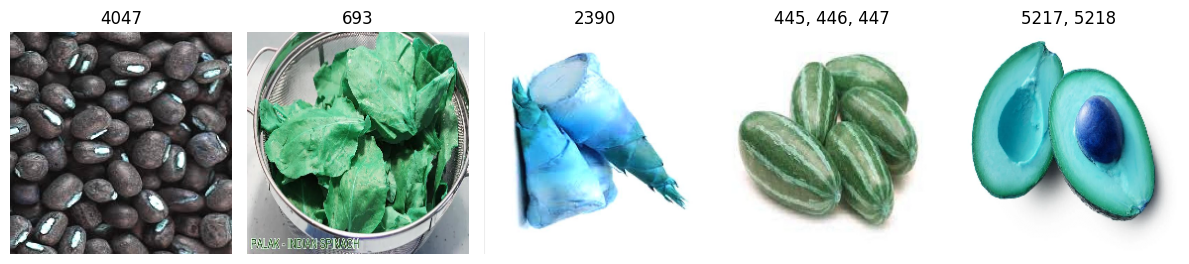

In [45]:
# Load the label binarizer
mlb = joblib.load("/content/drive/MyDrive/AI Recipe Final Project/label_binarizer.pkl")

plt.figure(figsize=(12, 6))
for i in range(5):
    idx = np.random.randint(0, len(X_train))
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])

    # Get the label IDs for the current sample
    label_ids = mlb.inverse_transform(np.array([y_train[idx]]))[0]

    # Map label IDs to label names
    label_names = [category_id_to_name.get(label_id, str(label_id)) for label_id in label_ids]

    plt.title(", ".join(label_names))
    plt.axis('off')
plt.tight_layout()
plt.show()

**Load preprocessed data**

In [50]:
X_train = np.load("/content/drive/MyDrive/AI Recipe Final Project/X_train.npy")
X_valid = np.load("/content/drive/MyDrive/AI Recipe Final Project/X_valid.npy")
X_test = np.load("/content/drive/MyDrive/AI Recipe Final Project/X_test.npy")

y_train = np.load("/content/drive/MyDrive/AI Recipe Final Project/y_train.npy")
y_valid = np.load("/content/drive/MyDrive/AI Recipe Final Project/y_valid.npy")
y_test = np.load("/content/drive/MyDrive/AI Recipe Final Project/y_test.npy")

# **Create CNN model with ResNet50**

In [56]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K

In [67]:
def multilabel_accuracy(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_pred > 0.5, dtype='float32')   # Thresholding
    equal = K.cast(K.equal(y_true, y_pred), dtype='float32')
    return K.mean(K.all(equal, axis=1))

In [68]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze initial layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(y_train.shape[1], activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

#Compile
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=[multilabel_accuracy])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,978,482 (106.73 MB)

 Trainable params: 4,390,770 (16.75 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

**Train the model**

In [69]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model_ckpt = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, model_ckpt]
)

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 26s 170ms/step - loss: 0.4412 - multilabel_accuracy: 5.2117e-04 - val_loss: 0.0103 - val_multilabel_accuracy: 0.0061
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0081 - multilabel_accuracy: 0.0026 - val_loss: 0.0039 - val_multilabel_accuracy: 0.0061
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0041 - multilabel_accuracy: 0.0034 - val_loss: 0.0034 - val_multilabel_accuracy: 0.0061
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0036 - multilabel_accuracy: 0.0030 - val_loss: 0.0034 - val_multilabel_accuracy: 0.0061
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0035 - multilabel_accuracy: 0.0025 - val_loss: 0.0034 - val_multilabel_accuracy: 0.0061
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0035 - multilabel_accuracy: 8.6671e-04 - val_loss: 0.0034 - val_multilabel_accuracy: 0.0061
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0034 - multilabel_accuracy: 0.0014 

In [70]:
# Unfreeze last 30 layers
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Re-compile
model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=[multilabel_accuracy])

# Train again
fine_tune = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop, model_ckpt]
)

Epoch 1/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - loss: 0.0033 - multilabel_accuracy: 0.0030 - val_loss: 0.0050 - val_multilabel_accuracy: 0.0061
Epoch 2/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0032 - multilabel_accuracy: 0.0018 - val_loss: 0.0053 - val_multilabel_accuracy: 0.0061
Epoch 3/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0031 - multilabel_accuracy: 0.0015 - val_loss: 0.0038 - val_multilabel_accuracy: 0.0061
Epoch 4/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0032 - multilabel_accuracy: 9.4482e-04 - val_loss: 0.0034 - val_multilabel_accuracy: 0.0061
Epoch 5/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0032 - multilabel_accuracy: 0.0038 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 6/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0031 - multilabel_accuracy: 0.0017 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 7/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0032 - multilabel_accuracy: 0.0031 - va

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Use this in model.fit
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_valid, y_valid),
    epochs=15,
    callbacks=[early_stop, model_ckpt]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 29s 328ms/step - loss: 0.0033 - multilabel_accuracy: 0.0024 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 2/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 318ms/step - loss: 0.0032 - multilabel_accuracy: 0.0023 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 3/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - loss: 0.0032 - multilabel_accuracy: 0.0026 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 4/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - loss: 0.0031 - multilabel_accuracy: 0.0017 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 5/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 318ms/step - loss: 0.0032 - multilabel_accuracy: 0.0019 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 6/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - loss: 0.0032 - multilabel_accuracy: 0.0030 - val_loss: 0.0033 - val_multilabel_accuracy: 0.0061
Epoch 7/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 28s 314ms/step - loss: 0.0032 - multilabel_accuracy: 0.0

**Evaluate**

In [71]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0033 - multilabel_accuracy: 0.0058
Test Accuracy: 0.17%


## **2. Text Dataset Preprocessing**

In [ ]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Image dataset's path**

In [ ]:
text_dataset = pd.read_csv("/content/drive/MyDrive/AI Recipe Final Project/full_dataset.csv")
text_dataset.head(10)

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
5,5,Cheeseburger Potato Soup,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo...",www.cookbooks.com/Recipe-Details.aspx?id=20115,Gathered,"[""baking potatoes"", ""extra lean ground beef"", ..."
6,6,Rhubarb Coffee Cake,"[""1 1/2 c. sugar"", ""1/2 c. butter"", ""1 egg"", ""...","[""Cream sugar and butter."", ""Add egg and beat ...",www.cookbooks.com/Recipe-Details.aspx?id=210288,Gathered,"[""sugar"", ""butter"", ""egg"", ""buttermilk"", ""flou..."
7,7,Scalloped Corn,"[""1 can cream-style corn"", ""1 can whole kernel...","[""Mix together both cans of corn, crackers, eg...",www.cookbooks.com/Recipe-Details.aspx?id=876969,Gathered,"[""cream-style corn"", ""whole kernel corn"", ""cra..."
8,8,Nolan'S Pepper Steak,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[""tomatoes"", ""water"", ""onions"", ""Worcestershir..."
9,9,Millionaire Pie,"[""1 large container Cool Whip"", ""1 large can c...","[""Empty Cool Whip into a bowl."", ""Drain juice ...",www.cookbooks.com/Recipe-Details.aspx?id=794547,Gathered,"[""pineapple"", ""condensed milk"", ""lemons"", ""pec..."


**Remove the last three columns**

In [ ]:
data = text_dataset.iloc[:, :-3]  # Keep only the first four columns
data.columns = ["No", "Recipe", "Ingredients", "Instructions"]
data.head(10)

,No,Recipe,Ingredients,Instructions
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish...."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ..."
5,5,Cheeseburger Potato Soup,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo..."
6,6,Rhubarb Coffee Cake,"[""1 1/2 c. sugar"", ""1/2 c. butter"", ""1 egg"", ""...","[""Cream sugar and butter."", ""Add egg and beat ..."
7,7,Scalloped Corn,"[""1 can cream-style corn"", ""1 can whole kernel...","[""Mix together both cans of corn, crackers, eg..."
8,8,Nolan'S Pepper Steak,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil..."
9,9,Millionaire Pie,"[""1 large container Cool Whip"", ""1 large can c...","[""Empty Cool Whip into a bowl."", ""Drain juice ..."


from matplotlib import pyplot as plt
_df_0['No'].plot(kind='hist', bins=20, title='No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['No']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'No'}, axis=1)
              .sort_values('No', ascending=True))
  xs = counted['No']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('No', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('No')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['No'].plot(kind='line', figsize=(8, 4), title='No')
plt.gca().spines[['top', 'right']].set_visible(False)

**Check for duplicate rows**

In [ ]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Show the duplicate rows (if any)
if not duplicate_rows.empty:
    print("\nDuplicate Rows Found:\n", duplicate_rows)
else:
    print("\nNo duplicate rows found in the dataset.")

print(f"Total number of rows in the dataset: {data.shape[0]}")

Number of duplicate rows: 0

No duplicate rows found in the dataset.
Total number of rows in the dataset: 2231142


**Check for missing values and remove rows with missing data**

In [ ]:
missing_rows = data[data.isnull().any(axis=1)]
print(f"Rows with missing values: {missing_rows.shape[0]}")
data = data.dropna()

# Print the number of rows after removal
print(f"Rows after removing missing values: {data.shape[0]}")

Rows with missing values: 1
Rows after removing missing values: 2231141


**Clean text data by removing stopwords, punctuation, and lemmatizing words**

In [ ]:
lemmatizer = WordNetLemmatizer()

**Function to preprocess the text (remove punctuation, lowercasing, tokenization, and lemmatization)**

In [ ]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = text.lower()  # Lowercase the text
    tokens = word_tokenize(text) # Tokenize the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens]) # Lemmatize each token
    return text

**Apply the preprocessing function to both 'Ingredients' and 'Instructions'**

In [ ]:
data['Ingredients'] = data['Ingredients'].apply(preprocess_text)
data['Instructions'] = data['Instructions'].apply(preprocess_text)

In [ ]:
#Cleaned dataset
print(data.head(10))

   No                    Recipe  \
0   0       No-Bake Nut Cookies   
1   1     Jewell Ball'S Chicken   
2   2               Creamy Corn   
3   3             Chicken Funny   
4   4      Reeses Cups(Candy)     
5   5  Cheeseburger Potato Soup   
6   6       Rhubarb Coffee Cake   
7   7            Scalloped Corn   
8   8      Nolan'S Pepper Steak   
9   9           Millionaire Pie   

                                         Ingredients  \
0  1 c firmly packed brown sugar 12 c evaporated ...   
1  1 small jar chipped beef cut up 4 boned chicke...   
2  2 16 oz pkg frozen corn 1 8 oz pkg cream chees...   
3  1 large whole chicken 2 10 12 oz can chicken g...   
4  1 c peanut butter 34 c graham cracker crumb 1 ...   
5  6 baking potato 1 lb of extra lean ground beef...   
6  1 12 c sugar 12 c butter 1 egg 1 c buttermilk ...   
7  1 can creamstyle corn 1 can whole kernel corn ...   
8  1 12 lb round steak 1inch thick cut into strip...   
9  1 large container cool whip 1 large can crushe...  

**Vectorize the text data using TF-IDF Vectorizer**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent terms
X_ingredients = vectorizer.fit_transform(data['Ingredients'])
X_instructions = vectorizer.fit_transform(data['Instructions'])

**Combine ingredient and instruction features**

In [ ]:
X = pd.concat([pd.DataFrame(X_ingredients.toarray()), pd.DataFrame(X_instructions.toarray())], axis=1)

# Define the target variable (Recipe categories) - Assuming 'Recipe' column is the target
y = data['Recipe']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a simple model (Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

**Save the processed data for future use**

In [ ]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'recipe_model.pkl')

# Example: Test the model with a new recipe input
def predict_recipe(ingredient_text, instruction_text):
    # Preprocess and vectorize the input text
    ingredient_input = preprocess_text(ingredient_text)
    instruction_input = preprocess_text(instruction_text)

    # Transform the input text using the saved vectorizer
    ingredient_input_vec = vectorizer.transform([ingredient_input])
    instruction_input_vec = vectorizer.transform([instruction_input])

    # Combine the input features
    input_vec = pd.concat([pd.DataFrame(ingredient_input_vec.toarray()), pd.DataFrame(instruction_input_vec.toarray())], axis=1)

    # Predict the recipe category
    predicted_recipe = model.predict(input_vec)
    return predicted_recipe[0]

Testing new recipe

In [ ]:
ingredient_text = "Tomato, Garlic, Olive oil, Salt"
instruction_text = "Chop the tomato, sauté garlic in olive oil, and cook for 5 minutes."
predicted_recipe = predict_recipe(ingredient_text, instruction_text)
print(f"Predicted Recipe: {predicted_recipe}")

In [ ]:
# Display cleaned dataset
print("\nCleaned Dataset:\n", data.head())


Cleaned Dataset:
    No                 Recipe  \
0   0    No-Bake Nut Cookies   
1   1  Jewell Ball'S Chicken   
2   2            Creamy Corn   
3   3          Chicken Funny   
4   4   Reeses Cups(Candy)     

                                         Ingredients  \
0  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  ["1 small jar chipped beef, cut up", "4 boned ...   
2  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4  ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                        Instructions  
0  ["In a heavy 2-quart saucepan, mix brown sugar...  
1  ["Place chipped beef on bottom of baking dish....  
2  ["In a slow cooker, combine all ingredients. C...  
3  ["Boil and debone chicken.", "Put bite size pi...  
4  ["Combine first four ingredients and press in ...  
